***
### Import modules : 

In [1]:
import os 
import pandas as pd 
from tqdm import tqdm
from collections import Counter, defaultdict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef


***
### Read the matrices :

In [6]:
path_finetuning = "/media/concha-eloko/Linux/PPT_clean/in_vitro/fine_tuning"

bea_df = pd.read_csv(f"{path_finetuning}/bea_fine_tuning.df", sep = "\t", header = 0)
bea_df["Protein"] = bea_df["Protein"].apply(lambda x : x.replace("_", "__"))
pool_bea = set([kltype.strip() for kltypes in bea_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

ferriol_df = pd.read_csv(f"{path_finetuning}/ferriol_fine_tuning.df", sep = "\t", header = 0)
#ferriol_df["Target"] = ferriol_df["Target"].apply(lambda x : x.replace("K", "KL"))
pool_ferriol = set([kltype.strip() for kltypes in ferriol_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

towndsend_df = pd.read_csv(f"{path_finetuning}/towndsend_fine_tuning.df", sep = "\t", header = 0)
towndsend_df["Protein"] = towndsend_df["Protein"].apply(lambda x : x.replace("_", "__"))
pool_towndsend = set([kltype.strip() for kltypes in towndsend_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

dico_matrices = {"ferriol" : {"matrix" : ferriol_df, "pool" : pool_ferriol}, 
                 "bea" : {"matrix": bea_df, "pool" : pool_bea}, 
                 "towndsend" : {"matrix" : towndsend_df, "pool" : pool_towndsend}}

# targets dico : 
dico_hits = {}
for author in dico_matrices :
    matrix = dico_matrices[author]["matrix"]
    for _, row in matrix.iterrows() : 
        for phage in matrix["Phages"].unique() : 
            all_targets = set()
            targets = matrix[matrix["Phages"] == phage]["Target"].values
            for calls in targets : 
                actual_targets = [x.strip() for x in calls.split(",")]
                all_targets.update(actual_targets)
            dico_hits[phage] = all_targets



> TropiGATv2 DF : 

In [8]:
path_project = "/media/concha-eloko/Linux/PPT_clean"

DF_info = pd.read_csv(f"{path_project}/TropiGATv2.final_df_v2.filtered.tsv", sep = "\t" ,  header = 0)

DF_info_lvl_0 = DF_info.copy()
df_prophages = DF_info_lvl_0.drop_duplicates(subset = ["Phage"])
dico_prophage_count = dict(Counter(df_prophages["KL_type_LCA"]))

KLtypes = [kltype for kltype in dico_prophage_count if dico_prophage_count[kltype] >= 20]



***
## Compiling the TropiGAT and TropiSeq predictions :

In [28]:
import pandas as pd 
import os 

path_project = "/media/concha-eloko/Linux/PPT_clean"

tropigat_others = pd.read_csv("/media/concha-eloko/Linux/PPT_clean/TropiGAT.Others.all.results.classic_2406.tsv", sep = "\t", names = ["protein", "predicitons"])
tropiseq_others = pd.read_csv("/media/concha-eloko/Linux/PPT_clean/Seqbased_model.results.bit75.2406.Others.tsv", sep = "\t", names = ["protein", "predicitons"])
merged_df = tropigat_others.merge(tropiseq_others, on='protein', how='inner')

info_others_df = pd.read_csv(f"{path_project}/in_vitro/other_naming_KL.tsv", sep = "\t", header = 0)
info_others_df["protein"] = info_others_df["Proteins"].apply(lambda x : x if x.count("(")==0 else x.split(" ")[0])


In [22]:
merged_df = tropigat_others.merge(tropiseq_others, on='protein', how='inner')
merged_df_sorted = merged_df.sort_values(by='protein', ascending=True)


In [29]:
merged_df_sorted["Target"] = merged_df_sorted["protein"].apply(lambda x : info_others_df[info_others_df["protein"] == x]["Target KLtype"].values[0])
merged_df_sorted["Phage"] = merged_df_sorted["protein"].apply(lambda x : info_others_df[info_others_df["protein"] == x]["Phage"].values[0])

merged_df_sorted.to_csv(f"{path_project}/Other_predictions.raw.tsv", sep ="\t", index = False, header = True)

In [30]:
merged_df_sorted

,protein,predicitons_x,predicitons_y,Target,Phage
0,AB716666.1_prot_BAP15736.1_24,KL13:0.977 ; KL123:0.971 ; KL14:0.962 ; KL7:0....,KL102:0.737,K1,Klebsiella phage NTUH-K2044-K1-1
1,AB716666.1_prot_BAP15746.1_34,KL52:0.996 ; KL62:0.996 ; KL128:0.99 ; KL43:0....,No_hits,K1,Klebsiella phage NTUH-K2044-K1-1
2,AB897757.1_prot_BAQ02835.1_55,KL123:0.997 ; KL145:0.974 ; KL43:0.764 ; KL27:...,No_associations,K11*,Klebsiella Phage ΦK64-1
3,AB897757.1_prot_BAQ02836.1_56,KL70:0.983 ; KL10:0.885 ; KL52:0.782 ; KL46:0....,KL70:0.888 ; KL21:0.674,KN4†,Klebsiella Phage ΦK64-1
4,AB897757.1_prot_BAQ02837.1_57,KL45:0.967 ; KL46:0.889 ; KL70:0.888 ; KL128:0...,KL123:0.711,K21*,Klebsiella Phage ΦK64-1
5,AB897757.1_prot_BAQ02838.1_58,KL52:0.979 ; KL46:0.968 ; KL34:0.921 ; KL21:0....,No_hits,KN5*,Klebsiella Phage ΦK64-1
6,AB897757.1_prot_BAQ02839.1_59,KL46:0.892 ; KL111:0.796 ; KL18:0.77 ; KL60:0....,No_associations,K25†,Klebsiella Phage ΦK64-1
7,AB897757.1_prot_BAQ02840.1_60,KL36:0.987 ; KL19:0.939 ; KL46:0.938 ; KL34:0....,KL35:0.66,K35†,Klebsiella Phage ΦK64-1
8,AB897757.1_prot_BAQ02841.1_61,KL169:0.997 ; KL52:0.984 ; KL45:0.979 ; KL81:0...,No_hits,K1*,Klebsiella Phage ΦK64-1
9,AB897757.1_prot_BAQ02842.1_62,KL14:0.988 ; KL18:0.971 ; KL57:0.969 ; KL64:0....,KL64:0.904,K64*,Klebsiella Phage ΦK64-1


In [15]:
sorted_dic_tropiseq, labels_tropiseq, count_kltypes = make_labels(tropigat_results, predictor = "tropiseq",  to_ignore = phages_to_ignore)
decript_dic(sorted_dic_tropiseq, labels_tropiseq, count_kltypes)

100%|████████████████████████████████████████| 128/128 [00:01<00:00, 111.69it/s]


KL2	16	0.28571	0.87903	0.1875	0.6	0.58449	0.28797
KL3	12	0.4	0.59091	0.25	1.0	0.625	0.36274
KL4	7	0.25	0.93023	0.14286	1.0	0.57143	0.36438
KL9	1	0.66667	0.98438	1.0	0.5	0.99206	0.70147
KL13	3	0.5	0.98039	0.33333	1.0	0.66667	0.57161
KL14	10	0.16667	0.91935	0.1	0.5	0.54561	0.19719
KL15	1	1.0	1.0	1.0	1.0	1.0	1.0
KL16	4	0.57143	0.97581	0.5	0.66667	0.74583	0.56538
KL17	2	0.66667	0.98438	0.5	1.0	0.75	0.70147
KL18	1	0.0	0.95312	0.0	0.0	0.48413	-0.02263
KL20	1	0.0	0.98039	0.0	0.0	0.49505	-0.0099
KL21	1	0.5	0.96875	1.0	0.33333	0.98413	0.56811
KL23	1	0.66667	0.98438	1.0	0.5	0.99206	0.70147
KL24	5	0.4	0.94118	0.4	0.4	0.68454	0.36907
KL25	3	0.85714	0.9902	1.0	0.75	0.99495	0.86164
KL27	2	0.66667	0.98438	0.5	1.0	0.75	0.70147
KL28	14	0.1	0.85484	0.07143	0.16667	0.51299	0.03831
KL30	3	0.33333	0.96078	0.33333	0.33333	0.65657	0.31313
KL31	1	0.0	0.96875	0.0	0.0	0.49206	-0.01587
KL35	7	0.57143	0.93023	0.57143	0.57143	0.76673	0.53345
KL39	3	0.0	0.92188	0.0	0.0	0.48361	-0.03983
KL43	2	0.0	0.95312	0.0	0.0	0.

In [13]:
dico_plot = {}
for combo in fold_combinations :
    print(combo ,len(fold_combinations[combo]), mean(fold_combinations[combo]), sep = "\t")
    a = {"Count" : len(fold_combinations[combo]), 
         "Proportion Called" : mean(fold_combinations[combo])}
    dico_plot[combo] = a

6-bladed beta-propeller & right-handed beta-helix	49	0.54421768707483
6-bladed beta-propeller	15	0.32707070707070707
right-handed beta-helix	39	0.6111111111111112
6-bladed beta-propeller & triple-helix	6	0.2813131313131313
triple-helix	9	0.4148148148148148
right-handed beta-helix & triple-helix	1	0.5


In [19]:
from scipy.stats import ttest_ind, mannwhitneyu

g_bh = fold_combinations["right-handed beta-helix"] + fold_combinations["right-handed beta-helix & triple-helix"] + fold_combinations["right-handed beta-helix & triple-helix"]
g_bp = fold_combinations["6-bladed beta-propeller"] + fold_combinations["triple-helix & 6-bladed beta-propeller"] + fold_combinations["6-bladed beta-propeller & right-handed beta-helix"]

u_statistic, p_value_u = mannwhitneyu(g_bh, g_bp)

u_statistic, p_value_u, mean(g_bp) , mean(g_bh)



(1485.5, 0.22471733913428515, 0.49332386363636366, 0.6056910569105691)

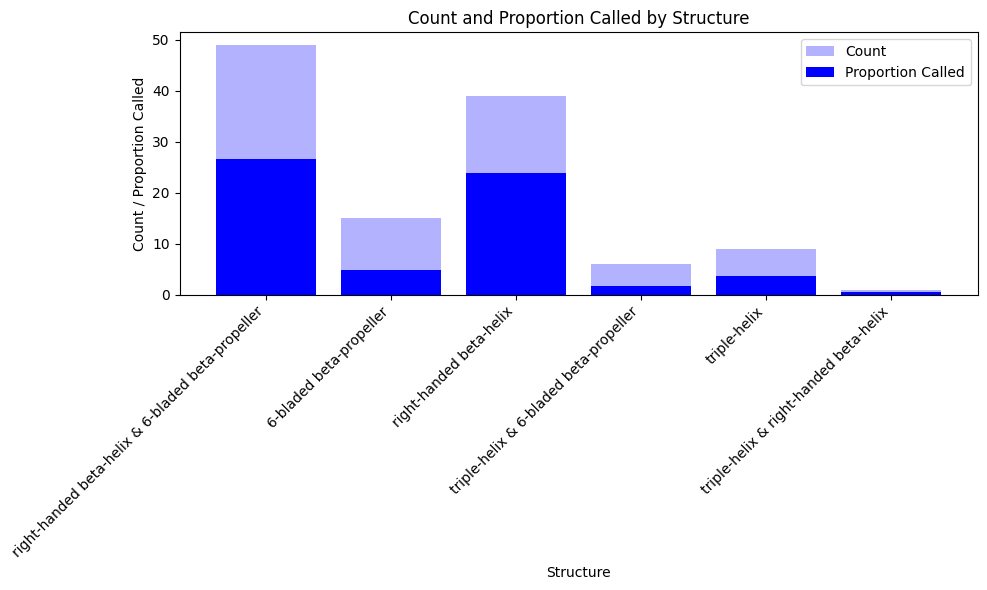

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_palette = sns.color_palette(["#87CEEB", "#1E90FF"])
data = {
    'right-handed beta-helix & 6-bladed beta-propeller': {'Count': 49, 'Proportion Called': 0.54421768707483},
    '6-bladed beta-propeller': {'Count': 15, 'Proportion Called': 0.32707070707070707},
    'right-handed beta-helix': {'Count': 39, 'Proportion Called': 0.6111111111111112},
    'triple-helix & 6-bladed beta-propeller': {'Count': 6, 'Proportion Called': 0.2813131313131313},
    'triple-helix': {'Count': 9, 'Proportion Called': 0.4148148148148148},
    'triple-helix & right-handed beta-helix': {'Count': 1, 'Proportion Called': 0.5}
}

# Extract keys and values from the dictionary
keys = list(data.keys())
counts = [entry['Count'] for entry in data.values()]
proportions = [entry['Proportion Called'] for entry in data.values()]

# Plotting
plt.figure(figsize=(10, 6))

# Plot bars for count with transparency
plt.bar(keys, counts, color='blue', alpha=0.3, label='Count')

# Plot bars for proportion called
plt.bar(keys, [count * prop for count, prop in zip(counts, proportions)], color='blue', alpha=1, label='Proportion Called')

# Add labels and title
plt.xlabel('Structure')
plt.ylabel('Count / Proportion Called')
plt.title('Count and Proportion Called by Structure')
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

> Compute the dico :

In [231]:
def random_selection_and_ranking(elements, n, m, bootstrap):
    counts = []
    for _ in range(bootstrap):
        count_top_n = 0
        for _ in range(m):
            # Step 1: Select a random element from the list
            random_element = random.choice(elements)
            # Step 2: Assign a random number between 0 and 1 to each element
            random_numbers = {element: random.random() for element in elements}
            # Step 3: Filter elements with random numbers > 0.5 and rank them
            filtered_elements = [element for element, rand_num in random_numbers.items() if rand_num > 0.5]
            ranked_elements = sorted(filtered_elements, key=lambda x: random_numbers[x], reverse=True)
            # Step 4: Check if the randomly picked element is present in the top n elements
            if random_element in ranked_elements[:n]:
                count_top_n += 1
        counts.append(count_top_n)
    
    return sum(counts) / len(counts)

In [12]:
def random_selection_and_ranking(elements, n, m, bootstrap):
    counts = []
    for _ in range(bootstrap):
        count_top_n = 0
        for _ in range(m):
            if random.choice(elements) in sorted(
                [(rand_num, element) for rand_num, element in {random.random(): element for element in elements}.items() if rand_num > 0.5],
                key=lambda x: x[1],
                reverse=True
            )[:n]:
                count_top_n += 1
        counts.append(count_top_n)
    
    return sum(counts) / len(counts)

In [233]:
%%time
random_tropigat_serie = []
random_tropiseq_serie = []

for n in range(1,41) : 
    # random tropigat
    random_tropigat = random_selection_and_ranking(kltypes_TropiGAT["KL_types"], n, 274, 1000)
    random_tropigat_serie.append(random_tropigat)
    # random tropiseq 
    random_tropiseq = random_selection_and_ranking(kltypes_TropiSeq["KL_types"], n, 274, 1000)
    random_tropiseq_serie.append(random_tropiseq)


CPU times: user 12min 12s, sys: 163 ms, total: 12min 12s
Wall time: 12min 13s


In [234]:
tropigat_serie = []
tropiseq_serie = []
total_serie = []

for n in range(1,42) : 
    total_calls, all_calls , TropiGAT_good_calls , TropiSeq_good_calls = get_calls_metrics(working_df, top_n = n, to_ignore = phages_to_ignore)
    tropigat_serie.append(len(TropiGAT_good_calls))
    tropiseq_serie.append(len(TropiSeq_good_calls))
    total_serie.append(len(all_calls))



In [235]:
dico_series = {
    "Random (TropiSeq approach)": {
        "values": [round(num) for num in random_tropiseq_serie],
        "color": "#ffdc73",
        "bold": False
    },
    "Random (TropiGAT approach)": {
        "values": [round(num) for num in random_tropigat_serie],
        "color": "#A3B18A",
        "bold": False
    },
    "TropiGAT": {
        "values": tropigat_serie[1:],
        "color": "#344E41",ResearchGate logo
        "bold": True
    },
    "TropiSeq": {
        "values": tropiseq_serie[1:],
        "color": "#a67c00",
        "bold": True
    },
    "TropiGAT + TropiSeq": {
        "values": total_serie[1:],
        "color": "#940000",
        "bold": True
    }
}

In [236]:
def clean_print(dico) :
	""" 
	Inputs : a dico
	Outputs : pretty printed dico
	"""
	import pprint
	pp = pprint.PrettyPrinter(width = 100, sort_dicts = True, compact = True)
	out = pp.pprint(dico)
	return out 

clean_print(dico_series)

{'Random (TropiGAT approach)': {'bold': False,
                                'color': '#A3B18A',
                                'values': [4, 8, 12, 16, 20, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61,
                                           65, 69, 74, 78, 82, 86, 90, 94, 98, 102, 106, 110, 114,
                                           118, 121, 124, 127, 129, 132, 133, 134, 135, 136, 136,
                                           137]},
 'Random (TropiSeq approach)': {'bold': False,
                                'color': '#ffdc73',
                                'values': [3, 6, 9, 12, 15, 18, 21, 25, 28, 31, 34, 37, 40, 43, 47,
                                           49, 52, 55, 58, 62, 65, 68, 71, 74, 77, 80, 83, 86, 89,
                                           92, 96, 98, 102, 104, 108, 111, 114, 117, 119, 122]},
 'TropiGAT': {'bold': True,
              'color': '#344E41',
              'values': [22, 29, 34, 39, 40, 47, 49, 56, 60, 62, 63, 69, 75, 78, 79, 80, 84, 89,

In [21]:
94/111*100 , 

(84.68468468468468,)

> The dico :

In [7]:
# m set to 220
dico_series_42 = {
 #'Random (TropiSeq approach)': {'bold': False,
 #                               'color': '#ffdc73',
 #                               'values': [3, 5, 8, 10, 13, 15, 17, 20, 22, 25, 27, 30, 32, 35, 37,
 #                                          40, 42, 45, 47, 50, 52, 55, 57, 60, 62, 65, 67, 70, 72,
 #                                          75, 77, 80, 82, 85, 87, 90, 92, 94, 97, 99]},
    'TropiGAT': {'bold': False,
              'color': '#344E41',
              'values': [22, 29, 34, 39, 40, 47, 49, 56, 60, 62, 63, 69, 75, 78, 79, 80, 84, 89, 90,
                         91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93, 93, 93,
                         93, 93]},
    'TropiSeq': {'bold': False,
              'color': '#a67c00',
              'values': [34, 40, 40, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
                         47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
                         47, 47]},
    'TropiGAT & TropiSeq': {'bold': True,
                         'color': '#940000',
                         'values': [45, 55, 58, 65, 66, 72, 73, 78, 80, 82, 83, 88, 94, 96, 97, 98,
                                    102, 107, 108, 109, 109, 109, 109, 109, 110, 110, 110, 110, 110,
                                    110, 110, 110, 111, 111, 111, 111, 111, 111, 111, 111]},
    'Random': {'bold': False,
               'color': '#A3B18A',
               'values': [3, 7, 10, 13, 17, 20, 23, 26, 30, 33, 36, 40, 43, 46, 50,
                       53, 56, 60, 63, 67, 70, 73, 76, 80, 83, 86, 89, 93, 96,
                       98, 101, 103, 104, 106, 108, 108, 110, 110, 110, 111]},

}

In [9]:
34/47*100

72.3404255319149

In [8]:
diferrences = [comb - rand for comb,rand in tuple(zip(dico_series_42["TropiGAT"]["values"] , dico_series_42["Random"]["values"]))]
diferrences


[19,
 22,
 24,
 26,
 23,
 27,
 26,
 30,
 30,
 29,
 27,
 29,
 32,
 32,
 29,
 27,
 28,
 29,
 27,
 24,
 21,
 18,
 15,
 11,
 9,
 6,
 3,
 -1,
 -4,
 -6,
 -9,
 -11,
 -11,
 -13,
 -15,
 -15,
 -17,
 -17,
 -17,
 -18]

In [245]:
diferrences = [comb - rand for comb,rand in tuple(zip(dico_series_42["TropiGAT + TropiSeq"]["values"] , dico_series_42["Random"]["values"]))]
diferrences

[42,
 48,
 48,
 52,
 49,
 52,
 50,
 52,
 50,
 49,
 47,
 48,
 51,
 50,
 47,
 45,
 46,
 47,
 45,
 42,
 39,
 36,
 33,
 29,
 27,
 24,
 21,
 17,
 14,
 12,
 9,
 7,
 7,
 5,
 3,
 3,
 1,
 1,
 1,
 0]

In [255]:
diferrences = [comb - rand for comb,rand in tuple(zip(dico_series_42["TropiSeq"]["values"] , dico_series_42["Random"]["values"]))]
diferrences



[31,
 33,
 30,
 33,
 29,
 27,
 24,
 21,
 17,
 14,
 11,
 7,
 4,
 1,
 -3,
 -6,
 -9,
 -13,
 -16,
 -20,
 -23,
 -26,
 -29,
 -33,
 -36,
 -39,
 -42,
 -46,
 -49,
 -51,
 -54,
 -56,
 -57,
 -59,
 -61,
 -61,
 -63,
 -63,
 -63,
 -64]

In [180]:
92/220*100

41.81818181818181

In [1]:
47/274*100

17.153284671532848

In [104]:
dico_series = {'Random (TropiGAT approach)': {'bold': False,
                                'color': '#A3B18A',
                                'values': [3, 6, 10, 13, 17, 20, 23, 27, 30, 33, 37, 40, 43, 47, 50,
                                           53, 56, 59, 63, 66]},
 'Random (TropiSeq approach)': {'bold': False,
                                'color': '#ffdc73',
                                'values': [2, 5, 8, 10, 12, 15, 17, 20, 22, 25, 27, 30, 32, 35, 37,
                                           40, 42, 45, 47, 50]},
 'TropiGAT': {'bold': True,
              'color': '#344E41',
              'values': [22, 29, 34, 39, 40, 47, 49, 56, 60, 62, 63, 69, 75, 78, 79, 80, 84, 89, 90,
                         91]},
 'TropiGAT + TropiSeq': {'bold': True,
                         'color': '#940000',
                         'values': [43, 54, 56, 57, 58, 65, 67, 74, 78, 80, 81, 86, 92, 94, 95, 96,
                                    100, 105, 106, 107]},
 'TropiSeq': {'bold': True,
              'color': '#a67c00',
              'values': [31, 37, 37, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
                         39]}}

In [146]:
dico_series = {'Random': {'bold': False,
                                'color': '#A3B18A',
                                'values': [3, 6, 10, 13, 17, 20, 23, 27, 30, 33, 37, 40, 43, 47, 50,
                                           53, 56, 59, 63, 66]},
 'TropiGAT': {'bold': True,
              'color': '#344E41',
              'values': [22, 29, 34, 39, 40, 47, 49, 56, 60, 62, 63, 69, 75, 78, 79, 80, 84, 89, 90,
                         91]},
 'TropiGAT + TropiSeq': {'bold': True,
                         'color': '#940000',
                         'values': [43, 54, 56, 57, 58, 65, 67, 74, 78, 80, 81, 86, 92, 94, 95, 96,
                                    100, 105, 106, 107]},
 'TropiSeq': {'bold': True,
              'color': '#a67c00',
              'values': [31, 37, 37, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
                         39]}}

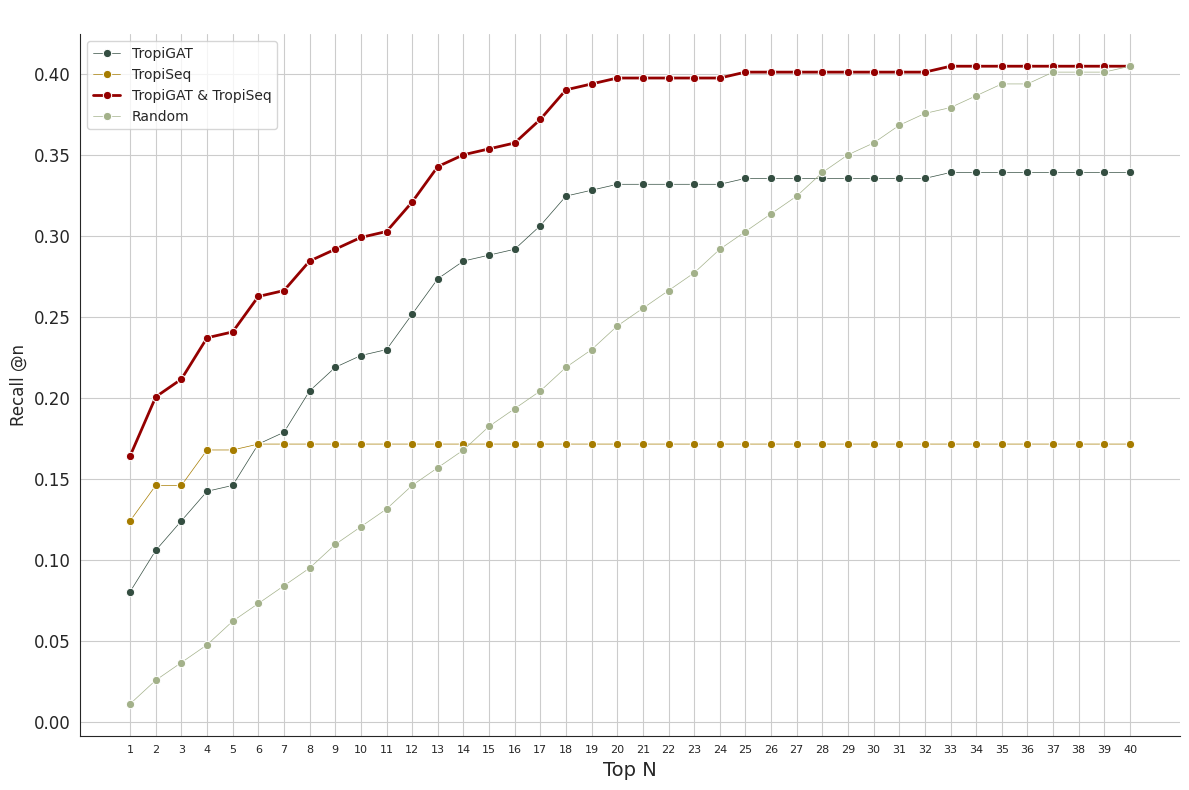

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define colors and line styles

sns.set_style("white")
sns.set_palette("muted")

# Plot each data series
plt.figure(figsize=(12, 8))
for label, series_info in dico_series_42.items():
    #values = series_info["values"]
    values = [num/274 for num in series_info["values"]]
    color = series_info["color"]
    bold = series_info["bold"]
    linestyle = '-' if bold else '-'
    linewidth = 2 if bold else 0.5
    sns.lineplot(x=range(1, len(values) + 1), y=values, label=label, marker='o', linestyle=linestyle, color=color, linewidth=linewidth, markersize=6)

# Customize the plot
plt.title(' ', fontsize=16)
plt.xlabel('Top N', fontsize=14)
plt.ylabel('Recall @N', fontsize=12)
plt.xticks(fontsize=8, rotation=0)  # Rotate x-axis tick labels horizontally
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

# Adjust x-axis ticks to integers
plt.xticks(range(1, len(values) + 1))

# Adjust spines
sns.despine()

plt.tight_layout()
plt.savefig('/media/concha-eloko/Linux/papers/PPT/figures_draft/Recall@N_PPT_Random.lytic.svg', dpi = 500)
plt.show()


> Number of KL types detected across @K

In [17]:
tropigat_kltypes_serie = []
tropiseq_kltypes_serie = []
total_kltypes_serie = []

def get_n_KLtypes(calls, detail = False) :
    n = len(set([item[1] for item in calls]))
    if detail :
        return n, set([item[1] for item in calls])
    else :
        return n 
    
for n in range(1,42) : 
    total_calls, all_calls , TropiGAT_good_calls , TropiSeq_good_calls = get_calls_metrics(working_df, top_n = n, to_ignore = phages_to_ignore)
    tropigat_kltypes_serie.append(get_n_KLtypes(TropiGAT_good_calls))
    tropiseq_kltypes_serie.append(get_n_KLtypes(TropiSeq_good_calls))
    total_kltypes_serie.append(get_n_KLtypes(all_calls))




In [36]:
dico_kltypes_series = {
    "TropiGAT": {
        "values": tropigat_kltypes_serie[1:],
        "color": "#344E41",
        "bold": False
    },
    "TropiSeq": {
        "values": tropiseq_kltypes_serie[1:],
        "color": "#a67c00",
        "bold": False
    },
    "TropiGAT + TropiSeq": {
        "values": total_kltypes_serie[1:],
        "color": "#940000",
        "bold": True
    }
}

In [40]:
def clean_print(dico) :
	""" 
	Inputs : a dico
	Outputs : pretty printed dico
	"""
	import pprint
	pp = pprint.PrettyPrinter(width = 100, sort_dicts = True, compact = True)
	out = pp.pprint(dico)
	return out 

clean_print(dico_kltypes_series)

{'TropiGAT': {'bold': True,
              'color': '#344E41',
              'values': [17, 21, 23, 25, 25, 27, 28, 28, 30, 30, 30, 32, 33, 34, 34, 34, 34, 34, 34,
                         34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35,
                         35, 35]},
 'TropiGAT + TropiSeq': {'bold': True,
                         'color': '#940000',
                         'values': [30, 35, 37, 38, 38, 40, 41, 41, 42, 42, 42, 43, 44, 44, 44, 44,
                                    44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
                                    45, 45, 45, 45, 45, 45, 45, 45]},
 'TropiSeq': {'bold': True,
              'color': '#a67c00',
              'values': [23, 25, 25, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
                         27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
                         27, 27]}}


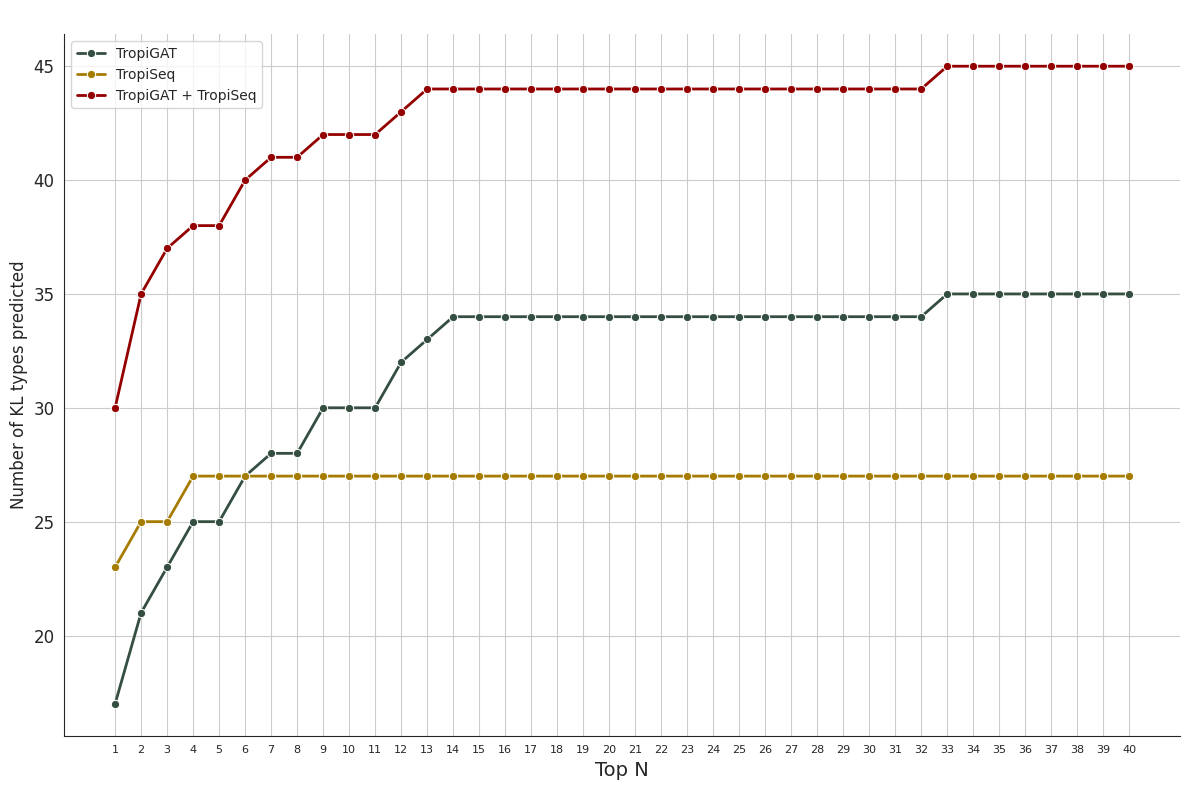

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define colors and line styles

sns.set_style("white")
sns.set_palette("muted")

# Plot each data series
plt.figure(figsize=(12, 8))
for label, series_info in dico_kltypes_series.items():
    #values = series_info["values"]
    values = [num for num in series_info["values"]]
    color = series_info["color"]
    bold = series_info["bold"]
    linestyle = '-' if bold else '-'
    linewidth = 2 if bold else 0.5
    sns.lineplot(x=range(1, len(values) + 1), y=values, label=label, marker='o', linestyle=linestyle, color=color, linewidth=linewidth, markersize=6)

# Customize the plot
plt.title(' ', fontsize=16)
plt.xlabel('Top N', fontsize=14)
plt.ylabel('Number of KL types predicted', fontsize=12)
plt.xticks(fontsize=8, rotation=0)  # Rotate x-axis tick labels horizontally
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

# Adjust x-axis ticks to integers
plt.xticks(range(1, len(values) + 1))

# Adjust spines
sns.despine()

plt.tight_layout()
plt.savefig('/media/concha-eloko/Linux/papers/PPT/figures_draft/nKLtypes@N_PPT_Random.lytic.svg', dpi = 500)
plt.show()

In [21]:
total_calls, all_calls , TropiGAT_good_calls , TropiSeq_good_calls = get_calls_metrics(working_df, top_n = 20, to_ignore = phages_to_ignore)

kl_tropigat = get_n_KLtypes(TropiGAT_good_calls, detail = True)

kl_tropiseq = get_n_KLtypes(TropiSeq_good_calls, detail = True)




In [53]:
all_types = get_n_KLtypes(total_calls,detail = True)

ignored_KLtypes = list(all_types[1] - (kl_tropigat[1] | kl_tropiseq[1]))
ignored_KLtypes.sort(key=lambda x: int(x.split("KL")[1]))
ignored_KLtypes

['KL1',
 'KL4',
 'KL5',
 'KL6',
 'KL7',
 'KL8',
 'KL11',
 'KL12',
 'KL20',
 'KL23',
 'KL26',
 'KL31',
 'KL32',
 'KL33',
 'KL40',
 'KL41',
 'KL42',
 'KL44',
 'KL50',
 'KL54',
 'KL55',
 'KL59',
 'KL61',
 'KL65',
 'KL67',
 'KL68',
 'KL69',
 'KL70',
 'KL71',
 'KL72',
 'KL79',
 'KL80',
 'KL82',
 'KL102',
 'KL103',
 'KL126',
 'KL134',
 'KL140',
 'KL144',
 'KL149',
 'KL157',
 'KL158']

In [49]:
all_types[1] - (kl_tropigat[1] | kl_tropiseq[1])

{'KL1',
 'KL102',
 'KL103',
 'KL11',
 'KL12',
 'KL126',
 'KL134',
 'KL140',
 'KL144',
 'KL149',
 'KL157',
 'KL158',
 'KL20',
 'KL23',
 'KL26',
 'KL31',
 'KL32',
 'KL33',
 'KL4',
 'KL40',
 'KL41',
 'KL42',
 'KL44',
 'KL5',
 'KL50',
 'KL54',
 'KL55',
 'KL59',
 'KL6',
 'KL61',
 'KL65',
 'KL67',
 'KL68',
 'KL69',
 'KL7',
 'KL70',
 'KL71',
 'KL72',
 'KL79',
 'KL8',
 'KL80',
 'KL82'}

In [37]:
kl_tropigat, kl_tropiseq

((34,
  {'KL10',
   'KL110',
   'KL13',
   'KL136',
   'KL14',
   'KL15',
   'KL16',
   'KL17',
   'KL18',
   'KL19',
   'KL2',
   'KL21',
   'KL22',
   'KL24',
   'KL25',
   'KL27',
   'KL28',
   'KL29',
   'KL3',
   'KL36',
   'KL38',
   'KL39',
   'KL43',
   'KL45',
   'KL46',
   'KL48',
   'KL52',
   'KL53',
   'KL57',
   'KL60',
   'KL62',
   'KL64',
   'KL74',
   'KL9'}),
 (27,
  {'KL110',
   'KL136',
   'KL139',
   'KL14',
   'KL15',
   'KL151',
   'KL16',
   'KL17',
   'KL18',
   'KL2',
   'KL21',
   'KL22',
   'KL24',
   'KL25',
   'KL27',
   'KL3',
   'KL30',
   'KL35',
   'KL37',
   'KL45',
   'KL51',
   'KL56',
   'KL57',
   'KL58',
   'KL63',
   'KL64',
   'KL66'}))

In [25]:
len(kl_tropigat[1] - kl_tropiseq[1]) , kl_tropigat[1] - kl_tropiseq[1]

(17,
 {'KL10',
  'KL13',
  'KL19',
  'KL28',
  'KL29',
  'KL36',
  'KL38',
  'KL39',
  'KL43',
  'KL46',
  'KL48',
  'KL52',
  'KL53',
  'KL60',
  'KL62',
  'KL74',
  'KL9'})

In [26]:
len(kl_tropiseq[1] - kl_tropigat[1]) , kl_tropiseq[1] - kl_tropigat[1]

(10,
 {'KL139',
  'KL151',
  'KL30',
  'KL35',
  'KL37',
  'KL51',
  'KL56',
  'KL58',
  'KL63',
  'KL66'})

In [41]:
len(kl_tropiseq[1] | kl_tropigat[1])

44

***